In [1]:
import os
import time
import numpy as np
import tensorflow as tf
import pandas as pd
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\raevs\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\raevs\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\raevs\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\raevs\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [ ]:
from test_tf_model_inference import *

In [3]:
with np.load('input_data.npz') as f:
    input_data = f['data']

In [4]:
model_best = tf.keras.models.load_model('model_best.hdf5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [23]:
results_model_best = test_inference_time_on_n_threads(model_best, n_treads_list=[1, 4, 8])

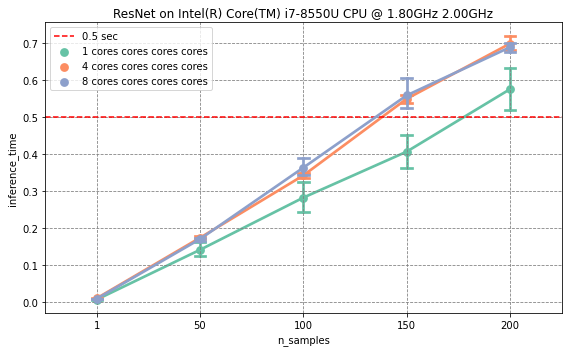

In [54]:
plot_inference_results(results_model_best, 
                       title='ResNet on Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz 2.00GHz',
                       save_path='results_data/resnet_inference_laptop.svg')

In [19]:
# results_raspberry = pd.read_excel('results_data/data_rapberry_pi.xlsx')
# results_raspberry['n_treads'] = 4
# df_150 = pd.DataFrame({'n_samples': [150],
#                        'inference_time': [np.nan],
#                        'n_treads': [4]})
# results_raspberry = results_raspberry.append(df_150)

In [56]:
# plot_inference_results(results_raspberry,
#                        title='ResNet on Raspberry Pi',
#                        save_path='resnet_inference_raspberry_pi.svg')

In [49]:
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# sns.pointplot(x='n_samples', y='inference_time', hue='n_treads', data=results_model_best, ax=ax[0])
# ax[0].set_title("ResNet on Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz")

# sns.pointplot(x='n_samples', y='inference_time', hue='n_treads', data=results_raspberry, ax=ax[0], color='orange')
# ax[0].set_title("ResNet on Raspberry Pi")


# plt.tight_layout()
# plt.grid(color='grey', linestyle='--')
# # plt.savefig("inference_resnet_xeon.png")
# plt.yscale('log')
# plt.show()

In [51]:
# fig = plt.figure(figsize=(8, 5))
# sns.pointplot(x='n_samples', y='inference_time', hue='n_treads', data=results_model_best)
# # set_title("ResNet on Intel(R) Xeon(R) CPU E5-2620 v4 @ 2.10GHz")

# sns.pointplot(x='n_samples', y='inference_time', hue='n_treads', data=results_raspberry, color='orange')
# # ax[0].set_title("ResNet on Raspberry Pi")

# plt.axhline(0.5, color='red', linestyle='--', label='0.5 sec')
# plt.text(2.5, 0.55, '0.5 sec limit')
# plt.tight_layout()
# plt.grid(color='grey', linestyle='--')
# # plt.savefig("inference_resnet_xeon.png")
# plt.yscale('log')
# plt.show()

In [ ]:
# Inference on whole dataset
y_pred_best = model_best.predict(input_data)
y_pred_last = model_last.predict(input_data)

In [ ]:
# Inference on single sample (time point)
y_pred_best = model_best.predict(input_data[0:1, :, :])
y_pred_last = model_last.predict(input_data[0:1, :, :])